<a href="https://colab.research.google.com/github/shivanishimpi/AutomatedSecurityImaging/blob/master/APIs_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created to simplify revision for Machine Learning and keeping a track of the subjects and topics studied
>> All code written is in Python

Author: Shivani Shimpi

Created on: 30.12.2020

References:
Course: TensorFlow Developer Certification Laurence Moroney

[Full notebook](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%202%20-%20Notebook.ipynb)


## ImageGenerator API

One limitation though was that it used a dataset of very uniform images. Images of clothing that was staged and framed in 28 by 28. **But what happens when you use larger images and where the feature might be in different locations?**


If your images have different sizes and different aspect ratios. The subject can be in different locations. In some cases, there may even be multiple subjects. In addition to that, the earlier examples with a fashion data used a built-in dataset. All of the data was handily split into training and test sets for you and labels were available. In many scenarios, that's not going to be the case and you'll have to do it for yourself. So in this lesson, we'll take a look at some of the APIs that are available to make that easier for you. In particular, the `image-generator` in TensorFlow.

One feature of the `image-generator` is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you. So for example, consider the directory structure in [Figure 1.1](#scrollTo=jek82_QKCTS2). You have an images directory and in that, you have sub-directories for training and validation. When you put sub-directories in these for horses and humans and store the requisite images in there, the `image-generator` can create a feeder for those images and auto label them for you. So for example, if I point an `image-generator` at the training directory, the labels will be horses and humans and all of the images in each directory will be loaded and labeled accordingly. Similarly, if I point one at the validation directory, the same thing will happen. 

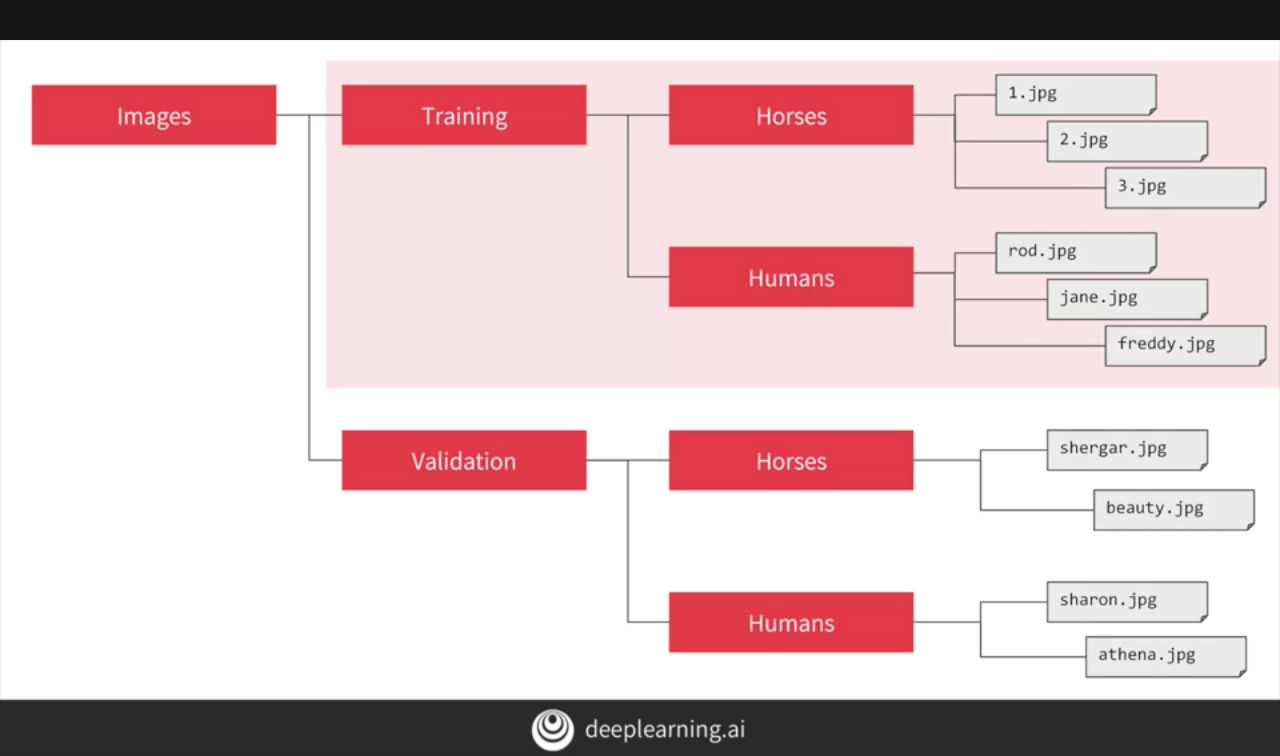

Looking at the iamge generator in code,

In [1]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, #point it at the directory that contains subdirectories
    target_size=(300,300), #one size for all images, reduces preprocessing
    batch_size=128, #experiment w different ones
    class_mode='binary' #classifier type
)

In [ ]:
##We are jsut discussing the code here, so let's take a look at model.fit

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8, #1024 images loading in 128 at a time hence 8 steps per epoch
    epochs = 15,
    validation_steps = 8, #256 images loading in batches of 32
    verbose =2 # how much to display during the training if more it hides the epoch progress
)

In [ ]:
#@title Clean Up Code
import os, signal
os.kill(os.getpid(), signal.SIGKILL)